<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Описание данных

`/datasets/Churn.csv`


***Признаки***

- `RowNumber` — индекс строки в данных

- `CustomerId` — уникальный идентификатор клиента

- `Surname` — фамилия

- `CreditScore` — кредитный рейтинг

- `Geography` — страна проживания

- `Gender` — пол

- `Age` — возраст

- `Tenure` — сколько лет человек является клиентом банка

- `Balance` — баланс на счёте

- `NumOfProducts` — количество продуктов банка, используемых клиентом

- `HasCrCard` — наличие кредитной карты

- `IsActiveMember` — активность клиента

- `EstimatedSalary` — предполагаемая зарплата

***Целевой признак***

- `Exited` — факт ухода клиента

## Подготовка данных

### Изучение общей информации

In [1]:
# !pip install --user -q pandas-profiling
# !conda install -c conda-forge pandas-profiling

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics  import accuracy_score

In [2]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import recall_score

In [3]:
RANDOM_SEED = 0

In [4]:
show_sample = lambda x: x.sample(5, random_state=RANDOM_SEED).reset_index(drop=True)

In [5]:
df = pd.read_csv('.//datasets/7ds_bank_customer_churn.csv')

In [6]:
show_sample(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9395,15615753,Upchurch,597,Germany,Female,35,8.0,131101.04,1,1,1,192852.67,0
1,899,15654700,Fallaci,523,France,Female,40,2.0,102967.41,1,1,0,128702.10,1
2,2399,15633877,Morrison,706,Spain,Female,42,8.0,95386.82,1,1,1,75732.25,0
3,5907,15745623,Worsnop,788,France,Male,32,4.0,112079.58,1,0,0,89368.59,0
4,2344,15765902,Gibson,706,Germany,Male,38,5.0,163034.82,2,1,1,135662.17,0


In [7]:
print('Размер датасета: ', df.shape)

Размер датасета:  (10000, 14)


In [8]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим, что разрядность не очень оптимальная для наших данных. Оптимизируем типы данных.

In [9]:
float_features = df.select_dtypes(include='float').columns
int_features = df.select_dtypes(include='integer').columns

df[float_features] = df[float_features].apply(pd.to_numeric, downcast='float')
df[int_features] = df[int_features].apply(pd.to_numeric, downcast='signed')

In [10]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int16  
 1   CustomerId       10000 non-null  int32  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int16  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int8   
 7   Tenure           9091 non-null   float32
 8   Balance          10000 non-null  float32
 9   NumOfProducts    10000 non-null  int8   
 10  HasCrCard        10000 non-null  int8   
 11  IsActiveMember   10000 non-null  int8   
 12  EstimatedSalary  10000 non-null  float32
 13  Exited           10000 non-null  int8   
dtypes: float32(3), int16(2), int32(1), int8(5), object(3)
memory usage: 478.6+ KB


Видим, что сократили объем памяти почти в 2 раза.

In [11]:
pd.DataFrame(round((df.isna().mean()), 2)).style.background_gradient('coolwarm')\
                                                                .set_caption('% пропусков').format({0:'{:.2%}'.format})

,0
RowNumber,0.00%
CustomerId,0.00%
Surname,0.00%
CreditScore,0.00%
Geography,0.00%
Gender,0.00%
Age,0.00%
Tenure,9.00%
Balance,0.00%
NumOfProducts,0.00%


Пропуски имеются только в столбце "Tenure".

### Подготовка данных

In [12]:
df.Tenure.unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan],
      dtype=float32)

Столбец `Tenure` лучше перевести в формат `int`. Но прежде чем это сделать, обработаем пропуски, заполнив медианой. Предположим, что этот показатель зависит от возрастной категории и от страны проживания (возрастная категория - потому что зачастую банки ориентированы на определенную возрастную категорию, страна проживания - потому что зачастую банки выходят на рынок определенной страны в определенный период).

In [13]:
df['age_cat'] = pd.qcut(df['Age'], q=[0, 0.25, 0.5, 0.75, 0.95, 1])
df.groupby(['age_cat', 'Geography']).agg({'Tenure':'count'})

Tenure
age_cat        Geography        
(17.999, 32.0] France       1340
               Germany       583
               Spain         613
(32.0, 37.0]   France       1077
               Germany       480
               Spain         525
(37.0, 44.0]   France       1136
               Germany       592
               Spain         599
(44.0, 60.0]   France        779
               Germany       531
               Spain         403
(60.0, 92.0]   France        218
               Germany       107
               Spain         108

В принципе выборка репрезентативна, так что можем смело заполнять пропуски медианой.

In [14]:
df['Tenure'] = df['Tenure'].fillna(df.groupby(['age_cat', 'Geography'])['Tenure'].transform('median'))
df['Tenure'] = df['Tenure'].astype('int')
df['Tenure'] = pd.to_numeric(df['Tenure'], downcast='signed')

In [15]:
show_sample(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat
0,9395,15615753,Upchurch,597,Germany,Female,35,8,131101.046875,1,1,1,192852.671875,0,"(32.0, 37.0]"
1,899,15654700,Fallaci,523,France,Female,40,2,102967.406250,1,1,0,128702.101562,1,"(37.0, 44.0]"
2,2399,15633877,Morrison,706,Spain,Female,42,8,95386.820312,1,1,1,75732.250000,0,"(37.0, 44.0]"
3,5907,15745623,Worsnop,788,France,Male,32,4,112079.578125,1,0,0,89368.593750,0,"(17.999, 32.0]"
4,2344,15765902,Gibson,706,Germany,Male,38,5,163034.812500,2,1,1,135662.171875,0,"(37.0, 44.0]"


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2.500750e+03,5.000500e+03,7.500250e+03,1.000000e+04
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,1.562853e+07,1.569074e+07,1.575323e+07,1.581569e+07
CreditScore,10000.0,6.505288e+02,96.653299,350.00,5.840000e+02,6.520000e+02,7.180000e+02,8.500000e+02
Age,10000.0,3.892180e+01,10.487806,18.00,3.200000e+01,3.700000e+01,4.400000e+01,9.200000e+01
Tenure,10000.0,4.997900e+00,2.760010,0.00,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01
Balance,10000.0,7.648589e+04,62397.406250,0.00,0.000000e+00,9.719854e+04,1.276442e+05,2.508981e+05
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
EstimatedSalary,10000.0,1.000902e+05,57510.492188,11.58,5.100211e+04,1.001939e+05,1.493883e+05,1.999925e+05


In [17]:
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [18]:
print('Кол-во дубликатов: ', df.duplicated().sum())

Кол-во дубликатов:  0


Больше всего людей в датасете с фамилией Smith и из Франции - 5014 значений. В данных превалирующее число мужчин. Дубликатов не обнаружено.

Сгруппируем листы из названий столбцов, чтобы выбрать наиболее релевантные для нас столбцы.

In [19]:
var_numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
               'EstimatedSalary', 'Exited']
var_obj = ['Geography', 'Gender']
var_useless = ['RowNumber', 'CustomerId', 'Surname', 'age_cat']

### Удаление нерелевантных столцов

In [20]:
df = df.drop(df[var_useless], axis = 1)

### Преобразование категориальных данных

Для того чтобы преобразовать категориальные данные будем использовать метод One Hot Encoding.

In [21]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [22]:
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.882812,1,0,0,0
1,608,41,1,83807.859375,1,0,1,112542.578125,0,0,1,0
2,502,42,8,159660.796875,3,1,0,113931.570312,1,0,0,0
3,699,39,1,0.000000,2,0,0,93826.632812,0,0,0,0
4,850,43,2,125510.820312,1,1,1,79084.101562,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000000,2,1,0,96270.640625,0,0,0,1
9996,516,35,10,57369.609375,1,1,1,101699.773438,0,0,0,1
9997,709,36,7,0.000000,1,0,1,42085.578125,1,0,0,0
9998,772,42,3,75075.312500,2,1,0,92888.523438,1,1,0,1


### Разделение на обучающую, валидационную и тестовую выборки

In [23]:
features = df_ohe.drop(['Exited'], axis=1)
target = df_ohe['Exited']

In [24]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                target, test_size=0.4, random_state=RANDOM_SEED)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5,
                                                                            random_state=RANDOM_SEED)

Проверим в правильном ли соотношении разделились выборки.

In [25]:
print(features_train.shape)
print(target_train.shape)

print('-----')

print(features_valid.shape)
print(target_valid.shape)

print('-----')

print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
-----
(2000, 11)
(2000,)
-----
(2000, 11)
(2000,)


Да, соотношение 3/1/1

## Выводы

* Датасет состоит из 1000 строк и 11 столбцов
* Увидели, что разрядность  не очень оптимальная для наших данных, оптимизировали типы данных. Таким образом сократили объем памяти почти в 2 раза.
* Пропуски были только в столбце "Tenure".
* Разделили всех клиентов на категории по возрасту для того, чтобы заполнить пропуски в столбце `Tenure` медианой. Предположили, что этот показатель зависит от возрастной категории и от страны проживания (возрастная категория - потому что зачастую банки ориентированы на определенную возрастную категорию, страна проживания - потому что зачастую банки выходят на рынок определенной страны в определенный период). 
* Для преобразования категориальных данных использован метод One Hot Encoding.
* Больше всего людей в датасете с фамилией Smith и из Франции - 5014 значений. В данных превалирующее число мужчин. Дубликатов не обнаружено.
* Разделили данные на обучающую, валидационную и тестовую выборки

## Исследование задачи

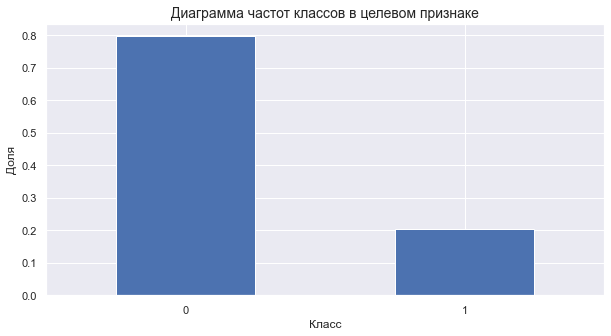

In [26]:
class_frequency = df_ohe['Exited'].value_counts(normalize=True)
plt.figure(figsize=(10, 5))
plt.title('Диаграмма частот классов в целевом признаке', size=14)
class_frequency.plot(kind='bar', rot=0)
plt.xlabel('Класс', size=12)
plt.ylabel('Доля', size=12)
plt.show()

Видим, что в данных превалирующее большинство тех, кто от нас не ушел. Наблюдаем дисбаланс классов.

Построим модели машинного обучения без учета дисбаланса классов. Поскольку в данном случае мы предсказываем класс, будем использовать модели решающего дерева и случайного леса.

In [27]:
model_dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
model_dt.fit(features_train, target_train)
predicted_valid_dt = model_dt.predict(features_valid)

In [28]:
confusion_matrix(target_valid, predicted_valid_dt)

array([[1355,  235],
       [ 198,  212]], dtype=int64)

In [29]:
accuracy_score(target_valid, predicted_valid_dt)

0.7835

In [30]:
recall_score(target_valid, predicted_valid_dt)

0.5170731707317073

In [31]:
# class_frequency = data['Claim'].value_counts(normalize=True)
# print(class_frequency)
# class_frequency.plot(kind='bar')

## Борьба с дисбалансом

## Тестирование модели

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*